<h3>Question 1: Please estimate the expected goals for United Arab Emirates vs Thailand (3/28) in the Friendly in United Arab Emirates.</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h2>Processing data on Excel</h2>

<p>To simplize as well as enlarge the dataset, I duplicated it, then take the <strong>home team</strong> in one dataset, and <strong>away team</strong> in the other to merge into one column <strong>"team"</strong> . I also modified or converted the following:</p>
   <ul>
    <li>the <strong>"h_rating"</strong> and <strong>"a_rating"</strong> were converted into <strong>"rating"</strong> (the team's rating) and <strong>"opp_rating"</strong> (opponent's rating)</li>
    <li><strong>"h_goal"</strong> and <strong>"a_goal"</strong> into <strong>"goal_scored"</strong> (number of goals scored by home team) and <strong>"goal_conceded"</strong> (number of goals scored by the opposing team).</li>
    <li><strong>"neutral"</strong> into <strong>"home_advantage"</strong> (with 3 categories: "-1" if the team played in the opponent's field, "0" if the game was neutral, and "1" if the team played in their home field).</li>
    <li>The column <strong>"rating_diff"</strong> (Rating difference between the team and their opponent) was added because my hypothesis is that whatever rating the team has, they can win or lose, score 0 goal or 10 goals, which means the rating would merely affects the team's goal in a match. However, the rating difference can have a considerable impact on the result.</li> 
    <li><strong>"year"</strong>,<strong>"date"</strong>, and <strong>"tournament"</strong> attributes were removed because of no contribution to quiz 1</li>
</ul>

<h2>Data preprocessing on Python</h2>

In [4]:
data = "/Users/dobaophuc/Documents/học data analyst/dataset/World Football Results 2018 to 2023.xlsx"
df = pd.read_excel(data, sheet_name ='datapro')
df.head()

,team,rating,opp_rating,goal_score,goal_conceded,home_advantage,rating_diff
0,Iraq,1570,1560,0,0,0,10
1,Oman,1511,1418,1,0,0,93
2,United Arab Emirates,1561,1526,0,0,0,35
3,Sweden,1825,1508,1,1,0,317
4,Finland,1595,1480,2,1,0,115


<p>Checking the data types and whether there are something unusual in other statistical figures...</p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8300 entries, 0 to 8299
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   team            8300 non-null   object
 1   rating          8300 non-null   int64 
 2   opp_rating      8300 non-null   int64 
 3   goal_score      8300 non-null   int64 
 4   goal_conceded   8300 non-null   int64 
 5   home_advantage  8300 non-null   int64 
 6   rating_diff     8300 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 454.0+ KB


In [6]:
df.describe()

,rating,opp_rating,goal_score,goal_conceded,home_advantage,rating_diff
count,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000,8300.000000
mean,1481.618434,1481.618434,1.314578,1.314578,0.000000,0.000000
std,323.433535,323.433535,1.471079,1.471079,0.827879,281.389151
min,395.000000,395.000000,0.000000,0.000000,-1.000000,-1234.000000
25%,1282.000000,1282.000000,0.000000,0.000000,-1.000000,-170.000000
50%,1504.000000,1504.000000,1.000000,1.000000,0.000000,0.000000
75%,1723.000000,1723.000000,2.000000,2.000000,1.000000,170.000000
max,2195.000000,2195.000000,14.000000,14.000000,1.000000,1234.000000


<p>Nothing unusual yet... Let's go ahead to check <strong>missing values</strong> and <strong>duplicated entries</strong>...</p>

In [16]:
df.isnull().sum()


team              0
rating            0
opp_rating        0
goal_score        0
goal_conceded     0
home_advantage    0
rating_diff       0
dtype: int64

In [17]:
df.duplicated().any()

False

<h2>Model Development</h2>

<h4>Check correlation between the dependent variable "goal_score" and other variables.</h4>

In [18]:
df.corr()['goal_score'].sort_values()

opp_rating       -0.270920
goal_conceded    -0.210437
rating            0.157520
home_advantage    0.178883
rating_diff       0.492457
goal_score        1.000000
Name: goal_score, dtype: float64

<p>It can be seen that only <strong>"rating_diff"</strong> has a considerable relationship with target <strong>goal_score</strong>. So now, I will try fitting the initial Simple Linear Regression first.</p>

<h3>Simple Linear Regression</h3>

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

#Define variables
x= df[['rating_diff']]
y= df['goal_score']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

lm.fit(x_train,y_train)
lm.score(x_test,y_test)

0.24759271796053217

<p>The model has <strong>R squared ~ 0.25</strong>, which means only about 25% of the data can be explained by the model.</p>

/Users/dobaophuc/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating_diff', ylabel='score'>

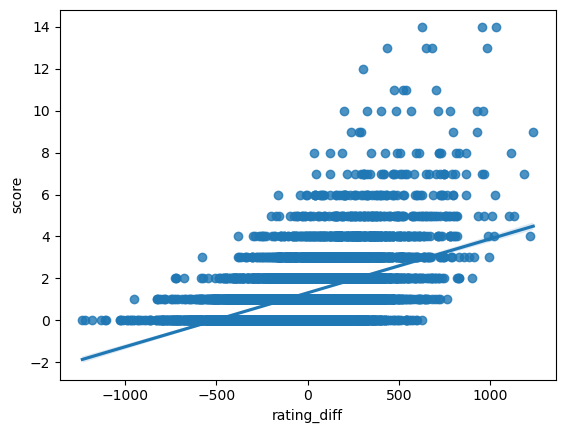

In [5]:
sns.regplot(x,y)

<AxesSubplot:xlabel='rating_diff', ylabel='score'>

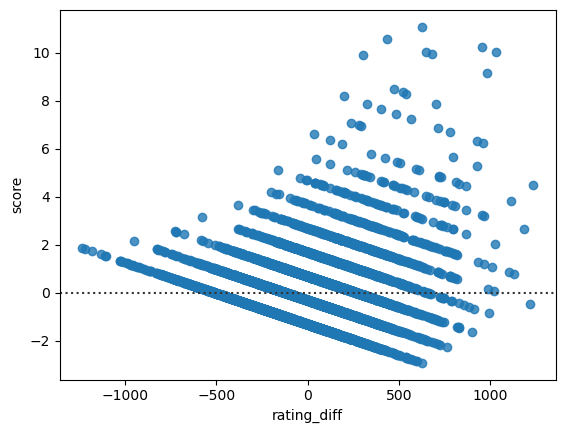

In [6]:
sns.residplot(x,y)

<p>Also, <strong>residual plot</strong> doesn't show the data points are randomly distributed, which means the estimation is biased. Now let's try fitting the <strong>Polynomial Model</strong>...</p>

<h3>Polynomial Regression</h3>

<p>First, we need to test <strong>which order of the polynomial regression will be the best</strong> for our dataset.</p>

In [20]:
from sklearn.preprocessing import PolynomialFeatures

Rsqu_test=[]
order = [1,2,3,4,5,6]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    Rsqu_test.append(poly.score(x_test_pr,y_test))
Rsqu_test


[0.24759271796053217,
 0.28511966165837876,
 0.28784244923936597,
 0.28767396187138583,
 0.2867349318256427,
 0.2776351733522302]

<p>It is at <strong>order = 3</strong> when R squared reaches its highest score, and R squared has been improved (though not much)  to <strong>~0.2878</strong>.</p>

In [21]:
pr = PolynomialFeatures(degree=3)
x_pr = pr.fit_transform(x)
poly.fit(x_pr,y)
print(poly.coef_)
print(poly.intercept_)



[0.00000000e+00 2.30757045e-03 2.07902549e-06 8.76950091e-10]
1.1499812113372192


In [31]:
x1= df['rating_diff']
y1= df['goal_score']
f = np.polyfit(x1, y1, 3) #return an array of b0,b1,b2,...
p= np.poly1d(f) #return the function
print('The function for predicting a team s goal is:')
print(p)
print('')
print('where x = rating_diff')

The function for predicting a team s goal is:
          3             2
8.77e-10 x + 2.079e-06 x + 0.002308 x + 1.15

where x = rating_diff


<p>Now, from <a href="https://www.fifa.com/fifa-world-ranking/">https://www.fifa.com/fifa-world-ranking/</a>, I have the current rating of UAE and Thailand are respectively 1338.48 and 1173.4, so the <strong>rating_diff = 165.08</strong>.</h4> 

In [10]:
varUAE = pr.fit_transform([[165.08]])
poly.predict(varUAE)

array([1.59151641])

In [11]:
varTHA = pr.fit_transform([[-165.08]])
poly.predict(varTHA)

array([0.82175875])

<h2>Answer:</h2>
<h4>In the next football match, UAE will score ~1.59 and Thailand will score ~0.82 goal.</h4>

<h3>Thanks for watching!</h3>